In [380]:
import pandas as pd

In [382]:
# Import database for historical data 

In [384]:
df = pd.read_csv("/Users/jbpothin/Desktop/ARIMA/Truck_sales.csv")
df.head()

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223


In [386]:
#See if null rows

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month-Year          132 non-null    object
 1   Number_Trucks_Sold  132 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [390]:
#Transform date format to fit models

In [392]:
df['Month-Year'] = '20' + df['Month-Year']
df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%Y-%b')
df

,Month-Year,Number_Trucks_Sold
0,2003-01-01,155
1,2003-02-01,173
2,2003-03-01,204
3,2003-04-01,219
4,2003-05-01,223
...,...,...
127,2013-08-01,861
128,2013-09-01,641
129,2013-10-01,564
130,2013-11-01,529


In [394]:
# Import database for "future" data to compare models

In [396]:
df_1 = pd.read_csv("/Users/jbpothin/Desktop/ARIMA/Truck_sales 2.csv")
df.head()

,Month-Year,Number_Trucks_Sold
0,2003-01-01,155
1,2003-02-01,173
2,2003-03-01,204
3,2003-04-01,219
4,2003-05-01,223


In [398]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month-Year          12 non-null     object
 1   Number_Trucks_Sold  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [400]:
df_1['Month-Year'] = '20' + df_1['Month-Year']
df_1['Month-Year'] = pd.to_datetime(df_1['Month-Year'], format='%Y-%b')
df_1

,Month-Year,Number_Trucks_Sold
0,2014-01-01,578
1,2014-02-01,572
2,2014-03-01,646
3,2014-04-01,781
4,2014-05-01,872
5,2014-06-01,824
6,2014-07-01,958
7,2014-08-01,933
8,2014-09-01,704
9,2014-10-01,639


In [402]:
# Concat databases to get the referencial data (compare predicted 2014 with actual)

In [404]:
database = pd.concat([df,df_1],ignore_index=True)

In [406]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Month-Year          144 non-null    datetime64[ns]
 1   Number_Trucks_Sold  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [408]:
import matplotlib.pyplot as plt

In [410]:
#Plot the truck sales to see its shape (stationnary ?)

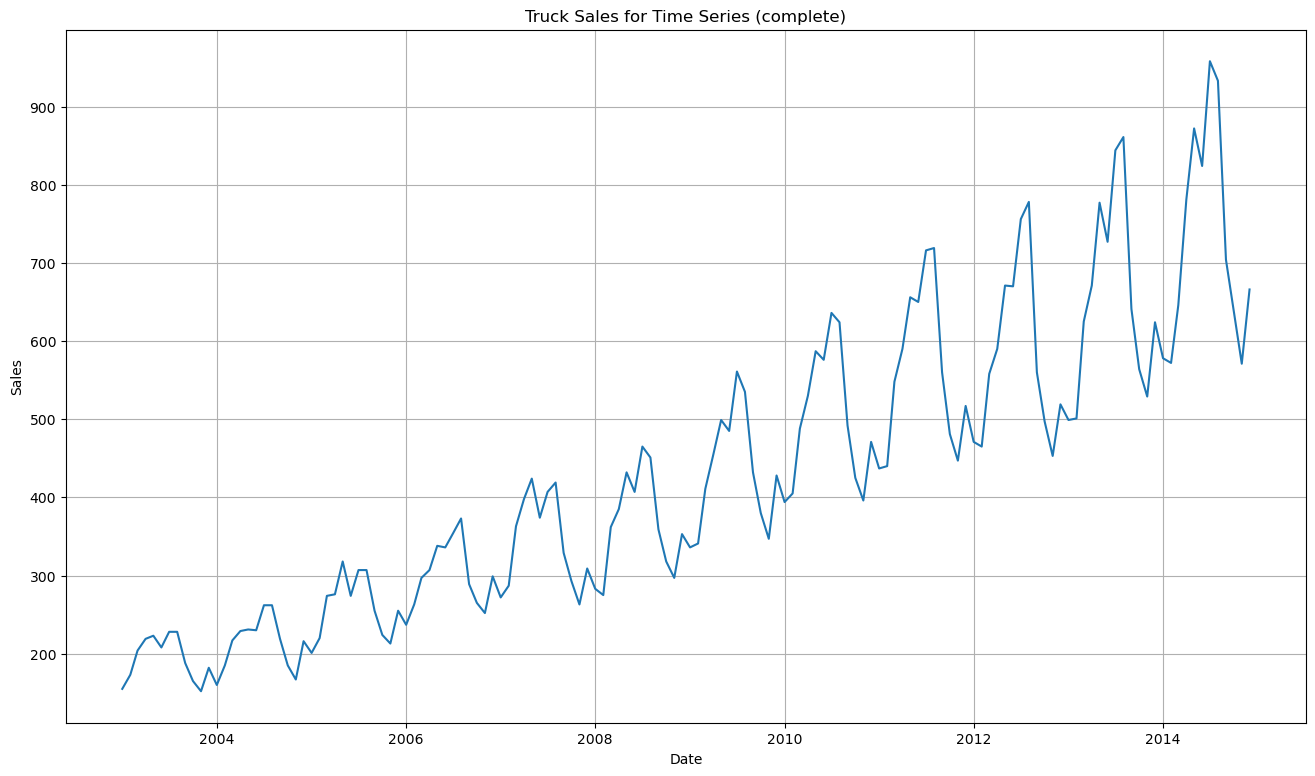

In [412]:
plt.figure(figsize=(16, 9))
plt.plot(database['Month-Year'], database['Number_Trucks_Sold'])
plt.grid(True)
plt.title('Truck Sales for Time Series (complete)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Differencing

In [415]:
# d(t) = y(t) - y(t-1)
# Stabilize the mean in keeping difference between t and t-1 values

In [417]:
database['Number_Trucks_Sold_Diff']=database['Number_Trucks_Sold'].diff()

In [419]:
database

,Month-Year,Number_Trucks_Sold,Number_Trucks_Sold_Diff
0,2003-01-01,155,NaN
1,2003-02-01,173,18.0
2,2003-03-01,204,31.0
3,2003-04-01,219,15.0
4,2003-05-01,223,4.0
...,...,...,...
139,2014-08-01,933,-25.0
140,2014-09-01,704,-229.0
141,2014-10-01,639,-65.0
142,2014-11-01,571,-68.0


In [421]:
#See the mean stabilized around 0 (tendency)

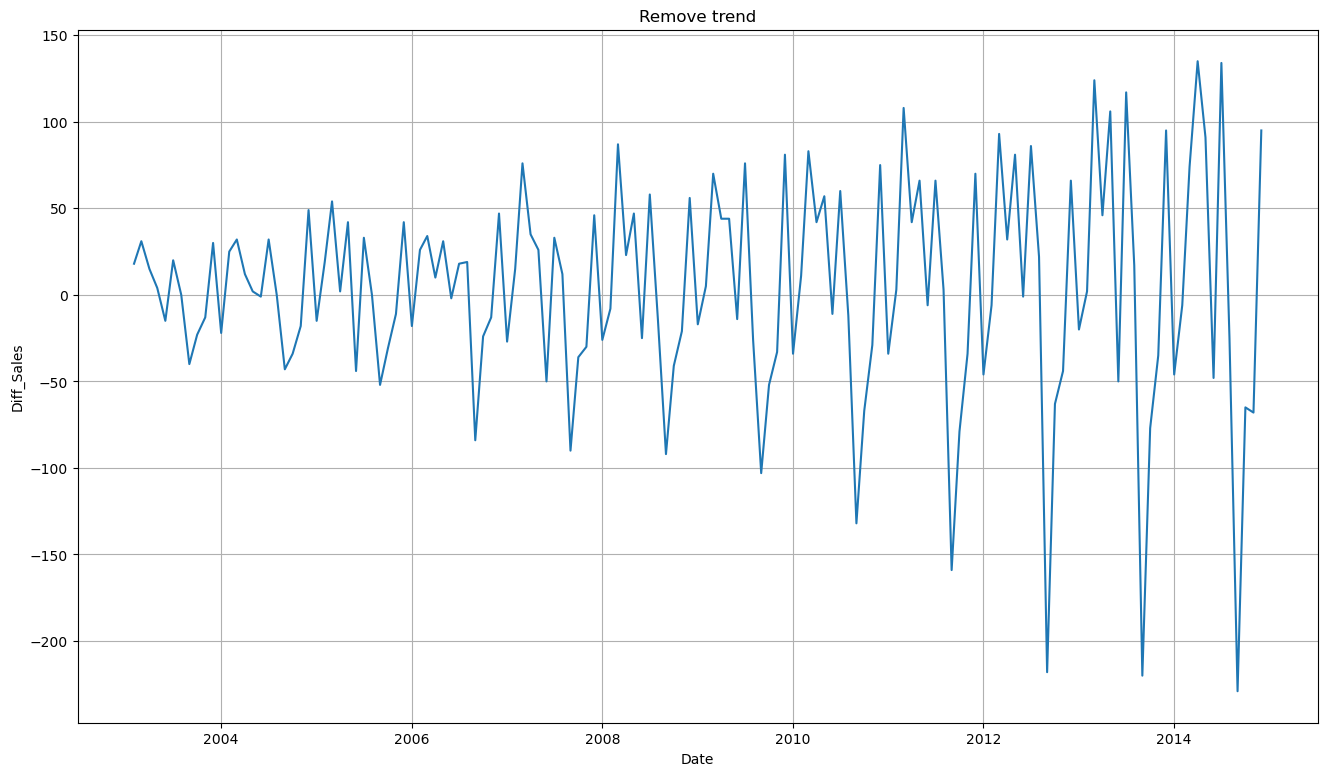

In [423]:
plt.figure(figsize=(16, 9))
plt.plot(database['Month-Year'], database['Number_Trucks_Sold_Diff'])
plt.grid(True)
plt.title('Remove trend')
plt.xlabel('Date')
plt.ylabel('Diff_Sales')
plt.show()

# Logarithm or Boxcox transformation

In [426]:
#Remove variance 

In [428]:
import numpy as np
from scipy.stats import boxcox

In [430]:
database['Number_Trucks_Sold_Log']=np.log(database['Number_Trucks_Sold'])

In [432]:
database['Number_Trucks_Sold_boxcox'],lam=boxcox(database['Number_Trucks_Sold'])

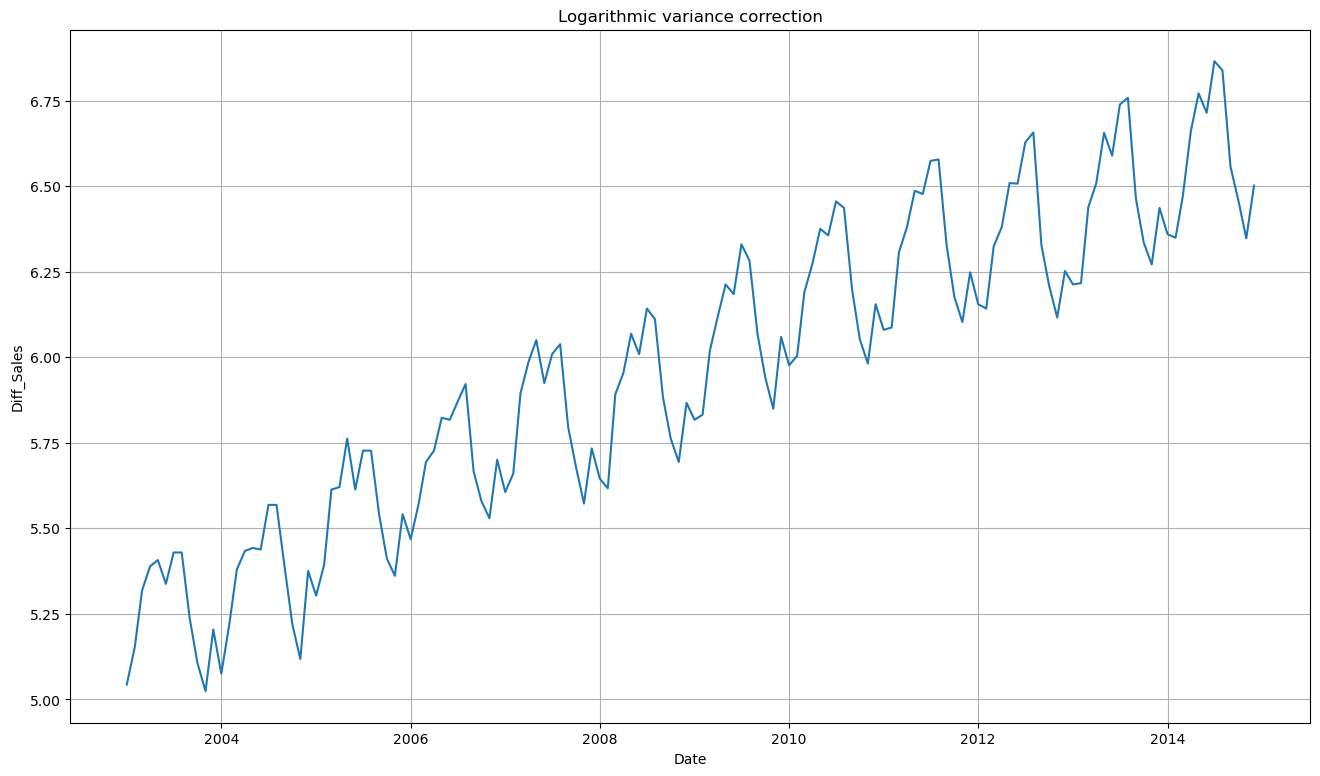

In [434]:
plt.figure(figsize=(16, 9))
plt.plot(database['Month-Year'], database['Number_Trucks_Sold_Log'])
plt.grid(True)
plt.title('Logarithmic variance correction')
plt.xlabel('Date')
plt.ylabel('Diff_Sales')
plt.show()

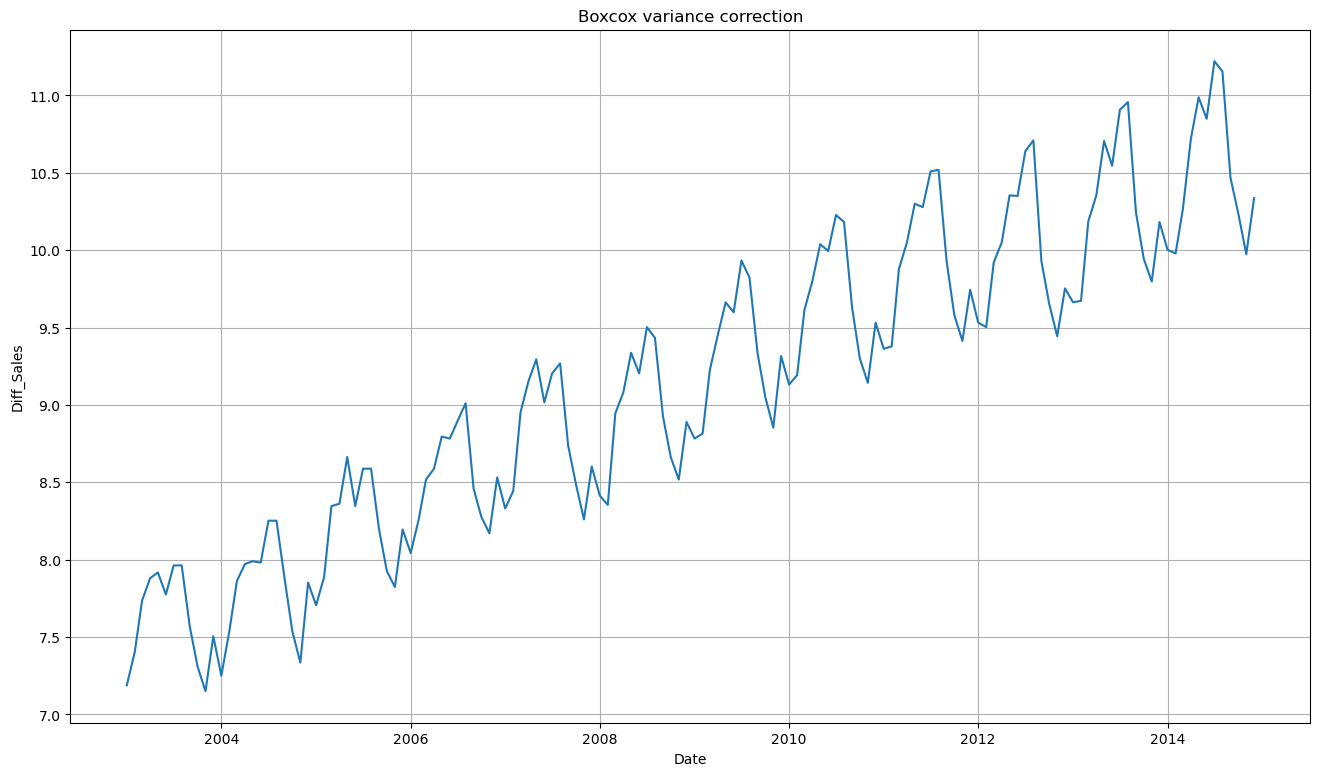

In [436]:
plt.figure(figsize=(16, 9))
plt.plot(database['Month-Year'], database['Number_Trucks_Sold_boxcox'])
plt.grid(True)
plt.title('Boxcox variance correction')
plt.xlabel('Date')
plt.ylabel('Diff_Sales')
plt.show()

# Logarithm / Boxcox + difference transformation

In [439]:
# stabilize mean and variance by applying .diff() to logarithm transformation or to boxcox

In [441]:
database['Number_Trucks_Sold_stat']= database['Number_Trucks_Sold_Log'].diff()

In [443]:
database['Number_Trucks_Sold_Stationnary']=database['Number_Trucks_Sold_boxcox'].diff()

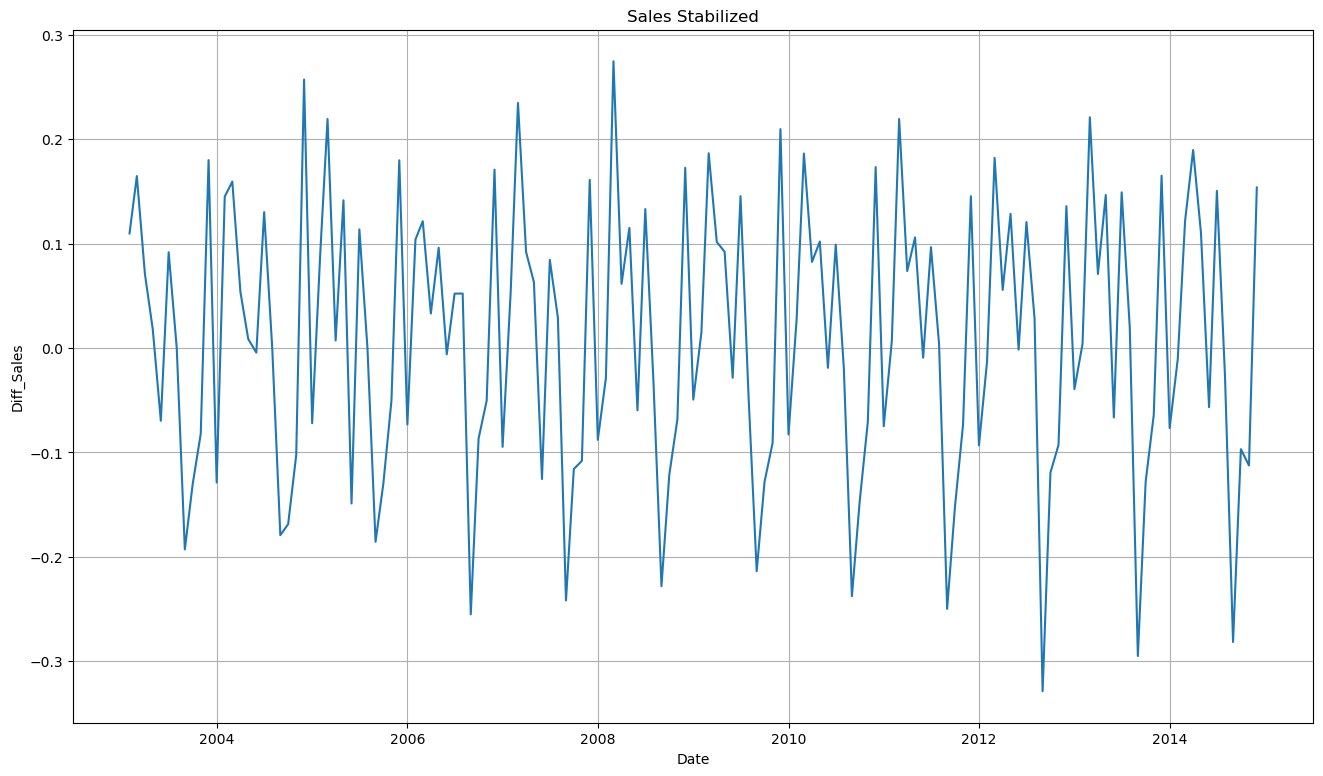

In [445]:
plt.figure(figsize=(16, 9))
plt.plot(database['Month-Year'], database['Number_Trucks_Sold_stat'])
plt.grid(True)
plt.title('Sales Stabilized')
plt.xlabel('Date')
plt.ylabel('Diff_Sales')
plt.show()

In [447]:
database['Number_Trucks_Sold_stat'].describe()

count    143.000000
mean       0.010195
std        0.130137
min       -0.328790
25%       -0.082419
50%        0.006842
75%        0.114451
max        0.274873
Name: Number_Trucks_Sold_stat, dtype: float64

# Stationnary Test

In [450]:
#Augmented Dickey Fuller Test for stationnarity

In [452]:
from statsmodels.tsa.stattools import adfuller

In [454]:
def adf_test(series):
    test_results=adfuller(series)
    P_value =  test_results[1]
    if P_value < 0.05:
        print('Data set is Stationnary')
    else:
        print('Dataset is not stationnary')
    print('Adf Statistics : ',test_results[0])
    print('P_Value : ',test_results[1])
    print('Critical Values : ')
    
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres,adf_stat))
        
print('Logarithm')
adf_test(database['Number_Trucks_Sold_stat'][1:])
print('Boxcox')
adf_test(database['Number_Trucks_Sold_Stationnary'][1:])

Logarithm
Dataset is not stationnary
Adf Statistics :  -2.6901120291426883
P_Value :  0.07576500493716327
Critical Values : 
	1%: -3.48
	5%: -2.88
	10%: -2.58
Boxcox
Dataset is not stationnary
Adf Statistics :  -2.8019040439393907
P_Value :  0.05800230325350256
Critical Values : 
	1%: -3.48
	5%: -2.88
	10%: -2.58


In [456]:
# With boxcox, the serie is stationnary at 5% null hypothesis acceptance, let continue with it
#Because log is not stationnary, we can apply another differenciation on it if necessary :

In [458]:
database['Number_Trucks_Sold_stat_2']=database['Number_Trucks_Sold_stat'].diff().dropna()

In [460]:
def adf_test_2(series_2):
    test_results_2=adfuller(series_2)
    P_value_2 =  test_results_2[1]
    if P_value_2 < 0.05:
        print('Data set is Stationnary')
    else:
        print('Dataset is not stationnary')
        
    print('Adf Statistics : ',test_results_2[0])
    print('P_Value_2 : ',test_results_2[1])
    print('Critical Values : ')
    
    for thres_2, adf_stat_2 in test_results_2[4].items():
        print('\t%s: %.2f' % (thres_2,adf_stat_2))
        
print('Logarithm 2x Diff')
adf_test(database['Number_Trucks_Sold_stat_2'].dropna().replace([np.inf, -np.inf], np.nan).dropna())

Logarithm 2x Diff
Data set is Stationnary
Adf Statistics :  -8.274634778776072
P_Value :  4.692374581868403e-13
Critical Values : 
	1%: -3.48
	5%: -2.88
	10%: -2.58


In [462]:
#In the case above, when using ARIMA, d would be equal to 2 : ARIMA(p,2,q)

In [464]:
import matplotlib.ticker as ticker
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

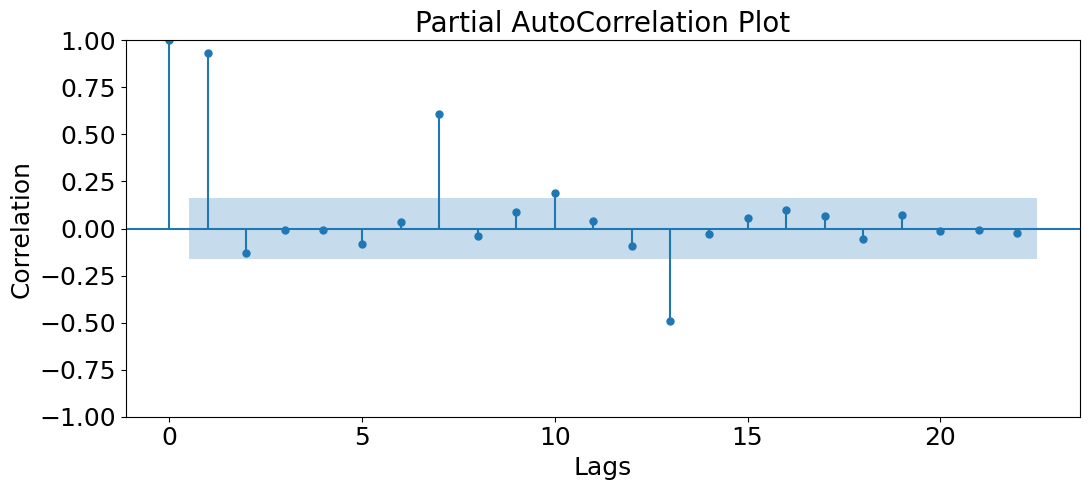

In [466]:
plt.rc("figure", figsize=(11,5))
plot_pacf(database['Number_Trucks_Sold'],method='ywm')
plt.xlabel('Lags',fontsize=18)
plt.ylabel('Correlation',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Partial AutoCorrelation Plot',fontsize=20)
plt.tight_layout()
plt.show()

In [598]:
#Let's keep 13 as p for PACF, AR(13), ARMA(13,q), ARIMA(13,d,q) last significant one

In [474]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [476]:
database.dropna(inplace=True)

In [516]:
train = database.iloc[:-int(len(database)*0.2)]
test = database.iloc[-int(len(database)*0.2):]

selector = ar_select_order(train['Number_Trucks_Sold_Stationnary'], 13)
model = AutoReg(train['Number_Trucks_Sold_Stationnary'],lags=selector.ar_lags).fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [518]:
import plotly.graph_objects as go
from scipy.special import inv_boxcox

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



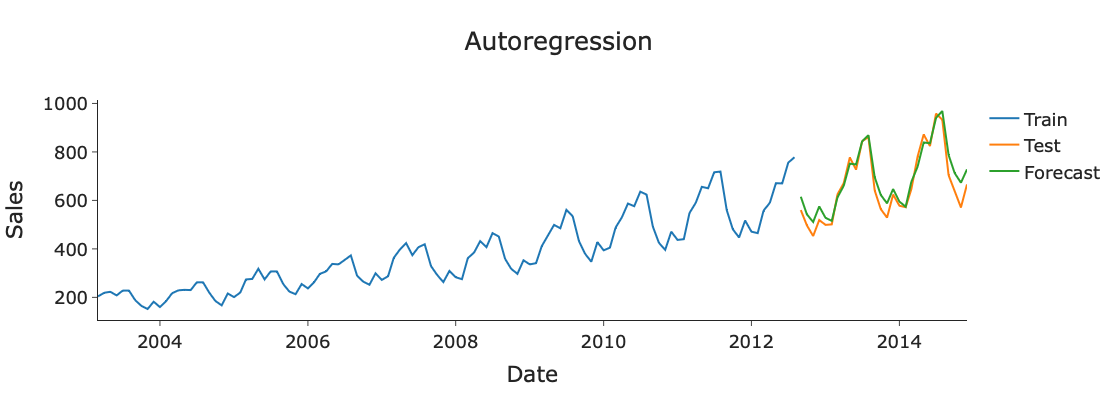

In [520]:
# Get forecasts and convert to actual passenger volumes
transformed_forecasts = list(model.forecast(steps=len(test)))
boxcox_forecasts = []
for idx in range(len(test)):
    if idx == 0:
        boxcox_forecast = transformed_forecasts[idx] + train['Number_Trucks_Sold_boxcox'].iloc[-1]
    else:
        boxcox_forecast = transformed_forecasts[idx] + boxcox_forecasts[idx-1]
        
    boxcox_forecasts.append(boxcox_forecast)

forecasts = inv_boxcox(boxcox_forecasts, lam)

def plot_forecasts(forecasts: list[float],title: str) -> None:
    '''Function tolplot the forecasts.'''''
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['Month-Year'], y=train['Number_Trucks_Sold'], name='Train'))
    fig.add_trace(go.Scatter(x=test['Month-Year'], y=test['Number_Trucks_Sold'], name='Test'))
    fig.add_trace(go.Scatter(x=test['Month-Year'], y=forecasts, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
    width=650, title_x=0.5, height=400, xaxis_title='Date', yaxis_title='Sales')

    return fig. show()

# Plot the forecasts
plot_forecasts(forecasts, 'Autoregression')

In [522]:
from sklearn.metrics import mean_absolute_percentage_error

In [524]:
mape = mean_absolute_percentage_error(test['Number_Trucks_Sold'], forecasts) * 100
print(f"Mean Absolute Percentage Error AutoRegressive Model : {mape}%")

Mean Absolute Percentage Error AutoRegressive Model : 6.093088676055344%


# Moving Average

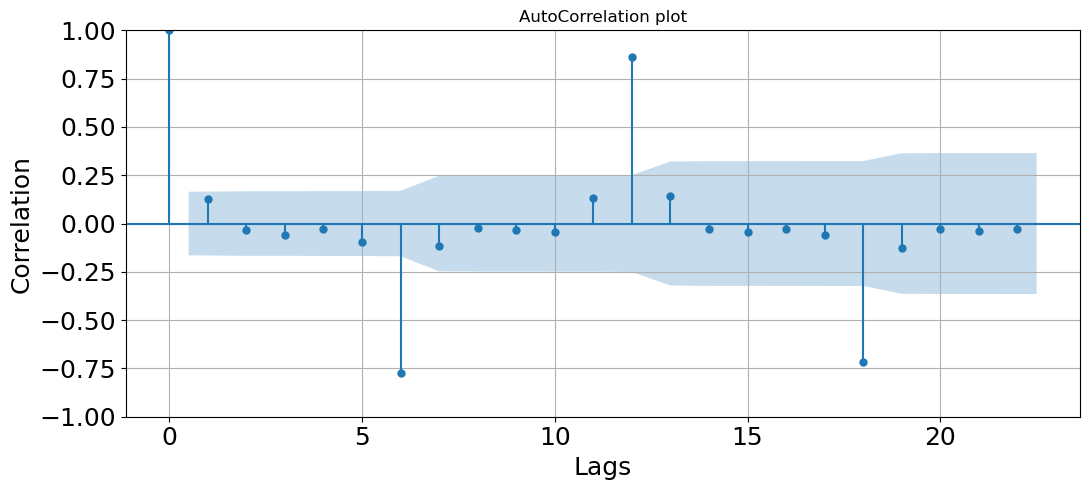

In [527]:
plt.rc("figure", figsize=(11,5))
plot_acf(database['Number_Trucks_Sold_Stationnary'])
plt.xlabel('Lags',fontsize=18)
plt.ylabel('Correlation',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("AutoCorrelation plot")
plt.tight_layout()
plt.grid()
plt.show()

In [600]:
#Let's keep 18 as q for ACF, MA(18), ARMA(13,18), ARIMA(13,d,18) last significant one

In [602]:
from statsmodels.tsa.arima.model import ARIMA

In [617]:
#ARIMA called but with p=0 and d=0 -> moving average MA(q)

In [608]:
train_ma = database.iloc[:-int(len(database)*0.2)]
test_ma = database.iloc[-int(len(database)*0.2):]

model_ma = ARIMA(train_ma['Number_Trucks_Sold_Stationnary'], order=(0,0,18)).fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



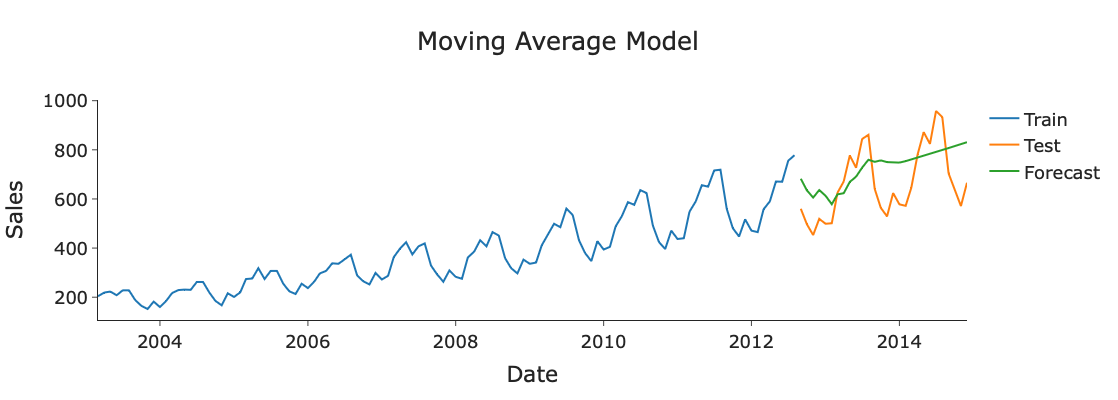

In [610]:
transformed_forecasts_ma =list(model_ma.forecast(steps=len(test_ma)))
boxcox_forecasts_ma = []
for idx_ma in range(len(test_ma)):
    if idx_ma==0:
        boxcox_forecast_ma = transformed_forecasts_ma[idx_ma]+train_ma['Number_Trucks_Sold_boxcox'].iloc[-1]
    else:
        boxcox_forecast_ma = transformed_forecasts_ma[idx_ma]+boxcox_forecasts_ma[idx_ma-1]
    
    boxcox_forecasts_ma.append(boxcox_forecast_ma)

forecasts_ma=inv_boxcox(boxcox_forecasts_ma,lam)


def plot_forecasts_ma(forecasts_ma: list[float],title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train_ma['Month-Year'], y=train_ma['Number_Trucks_Sold'], name= 'Train'))
    fig.add_trace(go.Scatter(x=test_ma['Month-Year'], y=test_ma['Number_Trucks_Sold'], name='Test'))
    fig.add_trace(go.Scatter(x=test_ma['Month-Year'], y=forecasts_ma, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date', yaxis_title='Sales')
    return fig.show()

# Plot the forecasts
plot_forecasts_ma(forecasts_ma, 'Moving Average Model')

    

In [612]:
mapema = mean_absolute_percentage_error(test_ma['Number_Trucks_Sold'], forecasts_ma) * 100
print(f"Mean Absolute Percentage Error Moving Average Model : {mapema}%")

Mean Absolute Percentage Error Moving Average Model : 19.61566581828094%


# ARMA

In [615]:
#ARIMA called but d=0 -> ARMA(p,q)

In [565]:
train_arma = database.iloc[:-int(len(database)*0.2)]
test_arma = database.iloc[-int(len(database)*0.2):]

#Model with integrated differenciation (1), so .diff() not useful here and redondant 
model_arma = ARIMA(train_arma['Number_Trucks_Sold_boxcox'], order=(13,0,18)).fit()
boxcox_forecasts_arma = model_arma.forecast(len(test_arma))
#Remove boxcox from the forecast
forecasts_arma=inv_boxcox(boxcox_forecasts_arma,lam)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

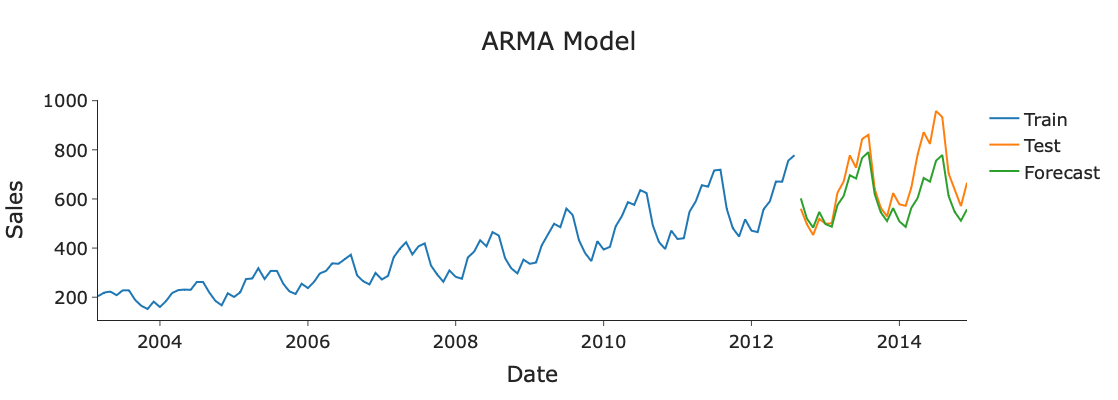

In [567]:
def plot_forecasts_arma(forecasts_arma: list[float],title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train_arma['Month-Year'], y=train_arma['Number_Trucks_Sold'], name= 'Train'))
    fig.add_trace(go.Scatter(x=test_arma['Month-Year'], y=test_arma['Number_Trucks_Sold'], name='Test'))
    fig.add_trace(go.Scatter(x=test_arma['Month-Year'], y=forecasts_arma, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date', yaxis_title='Sales')
    return fig.show()

# Plot the forecasts
plot_forecasts_arma(forecasts_arma, 'ARMA Model')

In [569]:
mapearma = mean_absolute_percentage_error(test_arma['Number_Trucks_Sold'], forecasts_arma) * 100
print(f"Mean Absolute Percentage Error ARMA Model : {mapearma}%")

Mean Absolute Percentage Error ARMA Model : 10.431875966623048%


# ARIMA

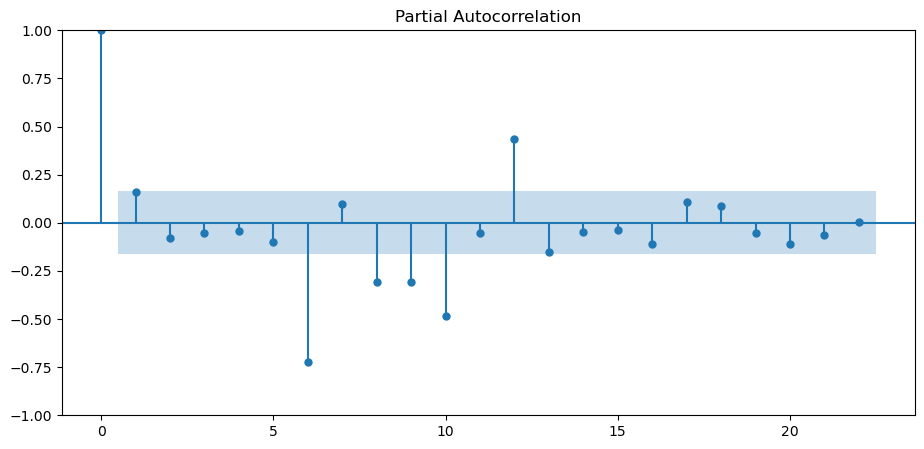

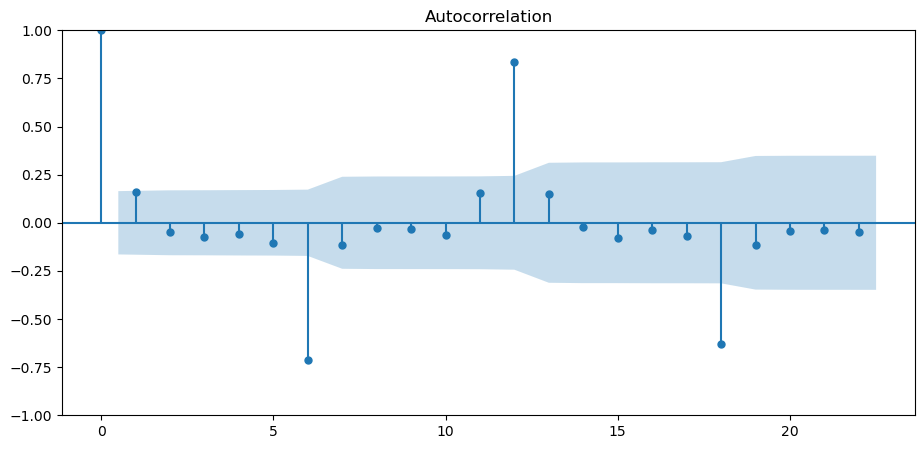

In [572]:
plot_pacf(database['Number_Trucks_Sold_Diff'],method='ywm')
plot_acf(database['Number_Trucks_Sold_Diff'])

plt.show()

In [635]:
#p =13 q=18
#d=1 because the dataset has been only one time transformed to be stationary
#d would have been 2 if we used the logarithmic method as before, transformed 2 times to be stationnary

In [637]:
#Arima model is already integrating differenciation (d!=0) so let's just take boxcox at first and then remake the forecast on the original data without boxcox

In [639]:
train_arima_is_so_fun = database.iloc[:-int(len(database)*0.2)]
test_arima_is_so_fun = database.iloc[-int(len(database)*0.2):]

#Model with integrated differenciation (1), so .diff() not useful here and redondant 
model_arima = ARIMA(train_arima_is_so_fun['Number_Trucks_Sold_boxcox'], order=(13,1,18)).fit()
boxcox_forecasts_arima = model_arima.forecast(len(test_arima_is_so_fun))
#Remove boxcox from the forecast
forecasts_arima=inv_boxcox(boxcox_forecasts_arima,lam)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

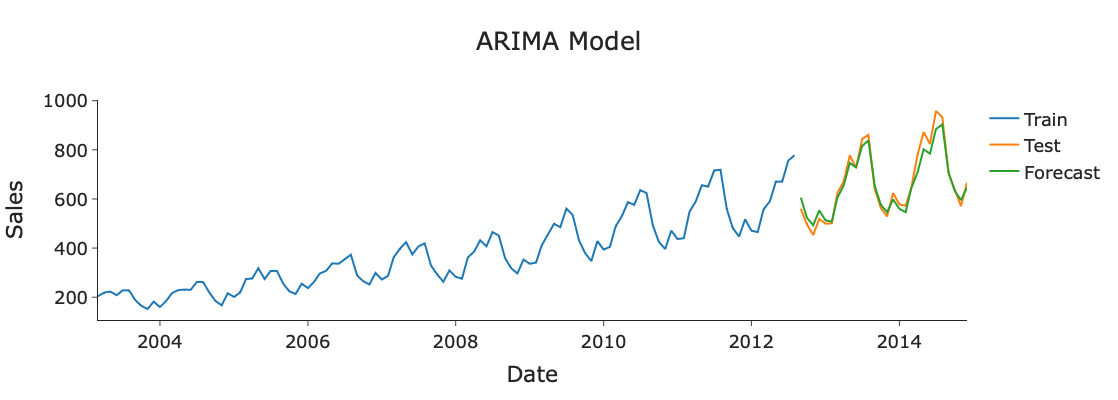

In [640]:
def plot_forecasts_arima_dont_we_deserve_an_A(forecasts_arima: list[float],title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train_arima_is_so_fun['Month-Year'], y=train_arima_is_so_fun['Number_Trucks_Sold'], name= 'Train'))
    fig.add_trace(go.Scatter(x=test_arima_is_so_fun['Month-Year'], y=test_arima_is_so_fun['Number_Trucks_Sold'], name='Test'))
    fig.add_trace(go.Scatter(x=test_arima_is_so_fun['Month-Year'], y=forecasts_arima, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date', yaxis_title='Sales')
    return fig.show()

# Plot the forecasts
plot_forecasts_arima_dont_we_deserve_an_A(forecasts_arima, 'ARIMA Model')

In [641]:
mapearima = mean_absolute_percentage_error(test_arima_is_so_fun['Number_Trucks_Sold'], forecasts_arima) * 100
print(f"Mean Absolute Percentage Error ARIMA Model : {mapearima}%")

Mean Absolute Percentage Error ARIMA Model : 3.9138499375164226%


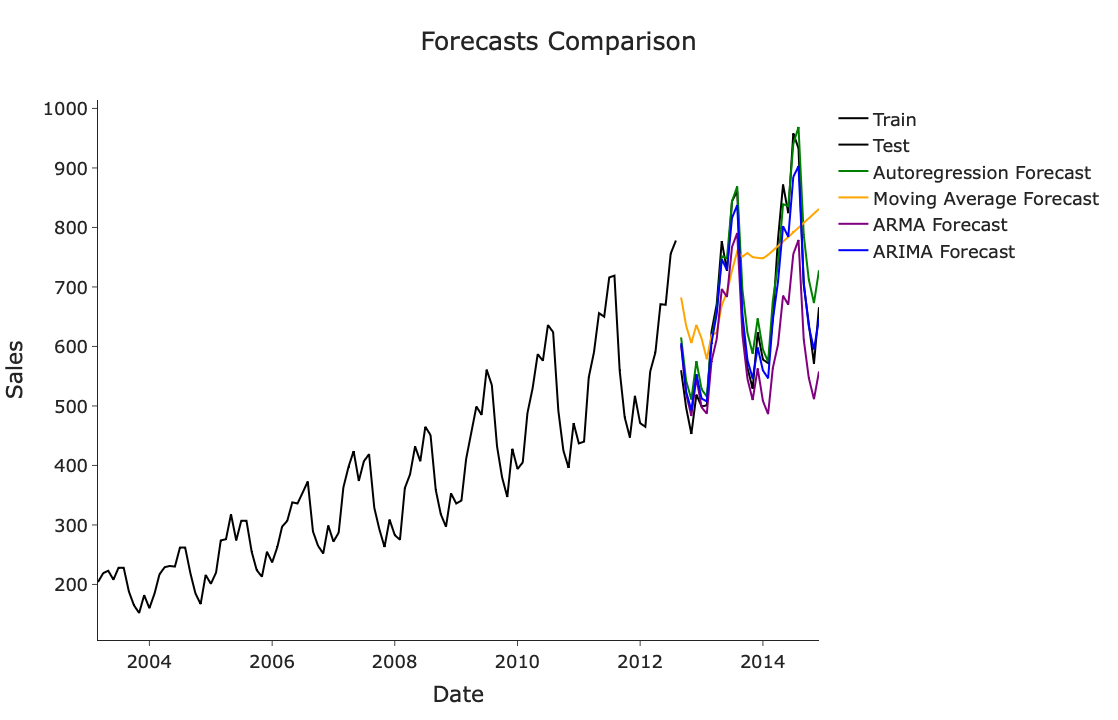

In [642]:
def plot_all_forecasts_decision_making_is_cool(forecasts_arima: list[float], 
                       forecasts_ma: list[float], 
                       forecasts_ar: list[float],forecasts_arma: list[float],
                       title: str = 'Forecast Comparison') -> None:
    """Function to plot and compare ARIMA, Moving Average, and Autoregression forecasts."""
    fig = go.Figure()

    # Train and Test data (common axes)
    fig.add_trace(go.Scatter(x=train['Month-Year'], y=train['Number_Trucks_Sold'], name='Train', line=dict(color='black')))
    fig.add_trace(go.Scatter(x=test['Month-Year'], y=test['Number_Trucks_Sold'], name='Test', line=dict(color='black')))

    # Forecasts
    fig.add_trace(go.Scatter(x=test['Month-Year'], y=forecasts_ar, name='Autoregression Forecast', line=dict(color='green')))
    fig.add_trace(go.Scatter(x=test['Month-Year'], y=forecasts_ma, name='Moving Average Forecast', line=dict(color='orange')))
    fig.add_trace(go.Scatter(x=test['Month-Year'], y=forecasts_arma, name='ARMA Forecast', line=dict(color='purple')))
    fig.add_trace(go.Scatter(x=test['Month-Year'], y=forecasts_arima, name='ARIMA Forecast', line=dict(color='blue')))

    # Layout
    fig.update_layout(
        template="simple_white",
        font=dict(size=18),
        title_text=title,
        title_x=0.5,
        width=1100,
        height=720,
        xaxis_title='Date',
        yaxis_title='Sales'
    )

    fig.show()


plot_all_forecasts_decision_making_is_cool(forecasts_arima, forecasts_ma, forecasts,forecasts_arma, 'Forecasts Comparison')

In [643]:
print(f"Mean Absolute Percentage Error AutoRegressive Model : {mape}%")
print(f"Mean Absolute Percentage Error Moving Average Model : {mapema}%")
print(f"Mean Absolute Percentage Error ARMA Model : {mapearma}%")
print(f"Mean Absolute Percentage Error ARIMA Model : {mapearima}%")

Mean Absolute Percentage Error AutoRegressive Model : 6.093088676055344%
Mean Absolute Percentage Error Moving Average Model : 19.61566581828094%
Mean Absolute Percentage Error ARMA Model : 10.431875966623048%
Mean Absolute Percentage Error ARIMA Model : 3.9138499375164226%


In [644]:
from sklearn.metrics import r2_score

r2_arima = r2_score(test['Number_Trucks_Sold'], forecasts_arima)
r2_ma = r2_score(test['Number_Trucks_Sold'], forecasts_ma)
r2_ar = r2_score(test['Number_Trucks_Sold'], forecasts)
r2_arma = r2_score(test['Number_Trucks_Sold'], forecasts_arma)

print(f'R² ARIMA: {r2_arima:.2f}')
print(f'R² Moving Average: {r2_ma:.2f}')
print(f'R² Autoregression: {r2_ar:.2f}')
print(f'R² ARMA: {r2_arma:.2f}')


R² ARIMA: 0.95
R² Moving Average: 0.07
R² Autoregression: 0.90
R² ARMA: 0.56


In [645]:
#ARIMA is the best fitted model in this case following MAPE showing that this is the most accurate model in terms of percentage error.
#And followind R² of 0.95: it explains 95% of the variance in the data

#Second choice is Autoregressive model

In [653]:
#To improve more this forecast, we could use SARIMA, whiwh would be introduced in the group's paper